README
=======
Project 5 - Logistric regression, Gaussian, and KNN

CPSC 483-02 Introduction to Machine Learning

Justin Nguyen - hoangjustin@csu.fullerton.edu

Goals: Within this project, anaconda and jupiter were to be used to run experiments from 3 datasets using scikit-learn module given from the project link. We used Panda DataFrame to play and output the data. We were to compare the scores of different models such as logistric regression, Gaussian, and KNN and output models in plots. Using the 3 datasets, we were to run compare which model works best. The coding language used is python 3.


1. Use read_csv() to load and examine each dataset.

In [8]:
#Import libraries - numpy, pandas, sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets

data1 = pd.read_csv('dataset1.csv')
data2 = pd.read_csv('dataset2.csv')
data3 = pd.read_csv('dataset3.csv')

In [9]:
#Load dataset1 
data1.columns = ['x1', 'x2','t']

#Load dataset2
data2.columns = ['x1', 'x2','t']

#Load dataset3
data3.columns = ['x1', 'x2','t']

#print to see if all 3 datasets has been read correctly
print(data1.head(), '\n', data2.head(), '\n', data3.head())

          x1         x2  t
0  24.330831  26.439146  1
1  21.124114  21.166814  1
2  10.517197  11.175424  0
3  19.737721  23.341138  1
4   8.404446   8.196714  0 
           x1         x2  t
0  20.211237   8.599145  1
1  12.675218  23.148375  1
2  17.552831  10.311698  1
3  14.959941  20.225844  1
4   7.066053  28.374781  0 
           x1         x2  t
0  34.060953  14.802478  0
1  30.860440  16.270849  0
2  21.738646  10.306756  1
3  17.664476  30.921761  1
4  23.610768  33.464780  1


2. Use logistic regression to fit() and score() a binary classifier for dataset 1. How accurate are the model’s predictions?

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X1 = data1[['x1','x2']].values
t = data1['t'].values


X_train, X_test, t_train, t_test = train_test_split(X1, t, test_size=0.4)

lr = LogisticRegression(fit_intercept=False)
lr.fit(X_train, t_train)
lr.score(X_test,t_test)


0.55

This model is not too accurate becuase the score of 0.55 is pretty low.

3. Repeat experiment (2) for dataset 2. How well does it score?

In [30]:
X2 = data2[['x1','x2']].values
t2 = data2['t'].values

X2_train, X2_test, t2_train, t2_test = train_test_split(X2, t2, test_size=0.4)
lr2 = LogisticRegression()
lr2.fit(X2_train, t2_train)
lr2.score(X2_test,t2_test)



0.6125

The second data set has a slightly better score than the first data set. Having the score of 0.6125 is better than the score of 0.55. 

4. Create scatterplots for datasets 1 and 2, plotting points from class 0 with a different color and marker from points in class 1. What accounts for the discrepancies between experiments (2) and (3)?


What accounted for the discrepancy is that there are more class 1s in dataset 2 than in dataset 1. Dataset2 ultimately had a higher value of score.

Blue : Class 0, Red : Class 1


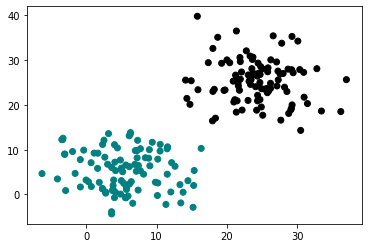

In [12]:
#Scatterplot for dataset1
import seaborn as sns
import matplotlib.pyplot as plt

#data1_labels = data1.columns

#datatest1 = pd.read_csv('dataset1.csv')
#print(datatest1(0))

color = ['black' if t != 0 else 'teal' for t in data1.t]
plt.scatter(data1.x1, data1.x2, c =color)
print("Blue : Class 0, Red : Class 1")



Blue : Class 0, Red : Class 1


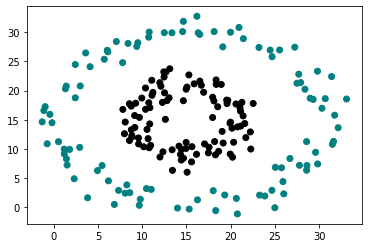

In [13]:
#Scatterplot for dataset2
color = ['black' if t != 0 else 'teal' for t in data2.t]
plt.scatter(data2.x1, data2.x2, c =color)
print("Blue : Class 0, Red : Class 1")


Blue : Class 0, Red : Class 1


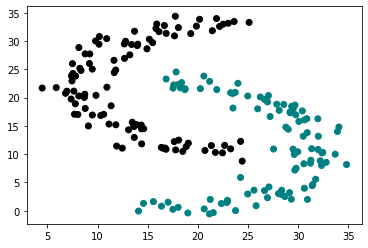

In [14]:
color = ['black' if t != 0 else 'teal' for t in data3.t]
plt.scatter(data3.x1, data3.x2, c =color)
print("Blue : Class 0, Red : Class 1")

5. Fit and score Gaussian Naive Bayes classifiers for datasets 1 and 2. How well do these classifiers score compared to logistic regression?


In [15]:
#Gaussian Naive Bayes classifiers for dataset1

from sklearn.naive_bayes import GaussianNB

X1 = data1[['x1','x2']].values
t = data1['t'].values
#x2 = data1['x2']
#x2 = data1['x2'].values.reshape(-1,1)

X_train, X_test, t_train, t_test = train_test_split(X1, t, test_size=0.5)
gnb = GaussianNB()
gnb.fit(X_train, t_train)
#t_pred_gnb = gnb.predict(X_test) 

#Gaussian Naive Bayes classifiers for dataset2

X2 = data2[['x1','x2']].values
t2 = data2['t'].values

X2_train, X2_test, t2_train, t2_test = train_test_split(X2, t2, test_size=0.5)

gnb2 = GaussianNB()
gnb2.fit(X2_train, t2_train)

#Gaussian Naive Bayes classifiers for dataset3

X3 = data3[['x1','x2']].values
t3 = data3['t'].values
X3_train, X3_test, t3_train, t3_test = train_test_split(X3, t3, test_size=0.5)

gnb3 = GaussianNB()
gnb3.fit(X3_train, t3_train)

print('GNB dataset1 : ',gnb.score(X_test,t_test))
print('GNB dataset2 : ',gnb2.score(X2_test,t2_test))
print('GNB dataset3 : ',gnb3.score(X3_test,t3_test))

GNB dataset1 :  1.0
GNB dataset2 :  1.0
GNB dataset3 :  0.88


For dataset 1 it scored the same score but when we look at dataset2, with gaussian naive bayes classifiers it had scored 0.98 with is better then the score for logistic regression.

6. Repeat experiment (5) with K-Nearest Neighbor classifiers with dataset1 and dataset2.


In [16]:
#K-Nearest Neighbor classifiers for dataset1

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, t_train)

#K-Nearest Neighbor classifiers for dataset2

neigh2 = KNeighborsClassifier(n_neighbors=15)

neigh2.fit(X2_train, t2_train)

#Print the values
print('dataset 1: ', neigh.score(X_test, t_test))
print('dataset 2: ', neigh2.score(X2_test, t2_test))

dataset 1:  1.0
dataset 2:  0.87


7. Using the second half of the Python code for Figure 9.2 - Simple Gaussian Naive Bayes Classification from Statistics, Data Mining, and Machine Learning in Astronomy, 2nd Edition as a guide, plot the decision boundaries for each classifier and dataset. What differences do you observe?

Dataset 1: The decision boundary for LinearRegression and Gaussian Naive Bayes classifiers produced similiar decision boundaries as are both linear. Additionally, the KNN classifier's decision boundary is nonlinear. The decision boundary correlates to where a new point has equal posterior probability of being part of each class.


Dataset 2: The decision boundary for LinearRegression shows the equal posterior probability of being part of each class is on the 17(x-axis). 
For Gaussian Naive Bayes classifier the decision boundary is nonlinear. Whereas, in dataset 1 the  Gaussian Naive Bayes decision boundary is linear. In addition, the points of equal posterior are highlighted in the center.
The KNN decision boundary is similiar to Gaussian Naive Bayes classifier in that the points of equal posterior are also highlighted in the center.


#Source: The following code on plotting a decision boundary on our datasets is guided by Hackernoon article. 

Site: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07


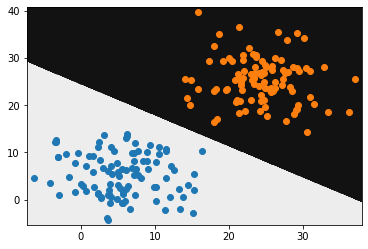

In [17]:
import seaborn as sns
from sklearn.datasets import make_blobs

#Decision Boundary - Logistic Regression on dataset1

# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_log1 = LogisticRegression()
model_log1.fit(X1, t)

# make predictions for the grid
yhat = model_log1.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t == class_value)
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap=plt.cm.binary)



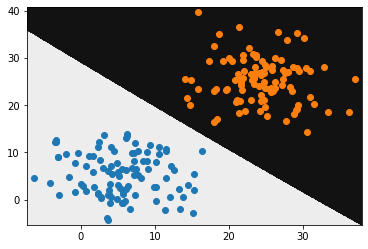

In [18]:
#Decision Boundary - Gaussian Naive Bayes classifier on dataset1

# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_gaus1 = GaussianNB()
model_gaus1.fit(X1, t)

# make predictions for the grid
yhat1 = model_gaus1.predict(grid)
# reshape the predictions back into a grid
zz = yhat1.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t == class_value)
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap=plt.cm.binary)


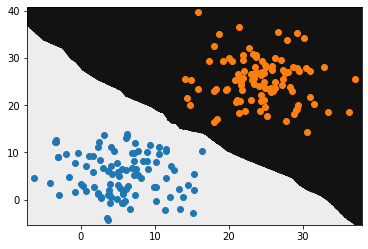

In [19]:
#Decision Boundary - K-Nearest Neighbor classifier on dataset1

# define bounds of the domain
min1, max1 = X1[:, 0].min()-1, X1[:, 0].max()+1
min2, max2 = X1[:, 1].min()-1, X1[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_knn1 = KNeighborsClassifier()
model_knn1.fit(X1, t)

# make predictions for the grid
yhat = model_knn1.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t == class_value)
    plt.scatter(X1[row_ix, 0], X1[row_ix, 1], cmap=plt.cm.binary)


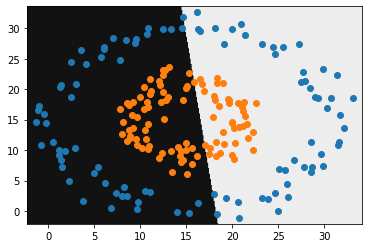

In [20]:
#Decision Boundary - Logistic Regression on dataset2

# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_log2 = LogisticRegression()
model_log2.fit(X2, t2)

# make predictions for the grid
yhat = model_log2.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t2 == class_value)
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap=plt.cm.binary)


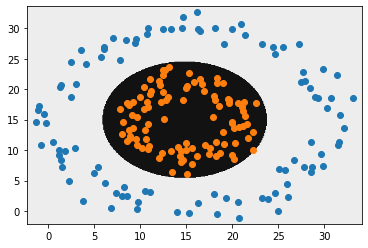

In [21]:
#Decision Boundary - Gaussian Naive Bayes classifier on dataset2

# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_gaus2 = GaussianNB()
model_gaus2.fit(X2, t2)

# make predictions for the grid
yhat = model_gaus2.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t2 == class_value)
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap=plt.cm.binary)


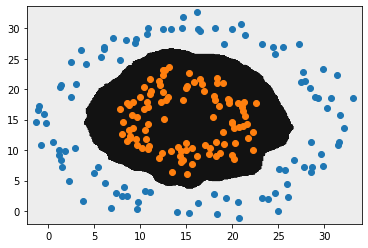

In [22]:
#Decision Boundary - K-Nearest Neighbor classifier on dataset2

# define bounds of the domain
min1, max1 = X2[:, 0].min()-1, X2[:, 0].max()+1
min2, max2 = X2[:, 1].min()-1, X2[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model and fit model
model_knn2 = KNeighborsClassifier()
model_knn2.fit(X2, t2)

# make predictions for the grid
yhat3 = model_knn2.predict(grid)
# reshape the predictions back into a grid
zz = yhat3.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t2 == class_value)
    plt.scatter(X2[row_ix, 0], X2[row_ix, 1], cmap=plt.cm.binary)


8. Now repeat experiments (2), (5), (6), and (7) with dataset 3.  


In [23]:
#2 logistic regression for dataset3

X3 = data3[['x1','x2']].values
t3 = data3['t'].values


X3_train, X3_test, t3_train, t3_test = train_test_split(X3, t3, test_size=0.4)

lr3 = LogisticRegression(fit_intercept=False)
lr3.fit(X3_train, t3_train)

#5 Gaussian Naive Bayes classifiers for dataset3

gnb3 = GaussianNB()
gnb3.fit(X3_train, t3_train)

#6 K-Nearest Neighbor classifiers for dataset3

neigh3 = KNeighborsClassifier(n_neighbors=15)
neigh3.fit(X3_train, t3_train)

# Print the values
print('dataset3\nlog reg: ' , lr3.score(X3_test,t3_test))
print('gaussian: ' ,gnb3.score(X3_test,t3_test))
print('KNN: ' , neigh3.score(X3_test, t3_test))

dataset3
log reg:  0.825
gaussian:  0.9
KNN:  0.9875


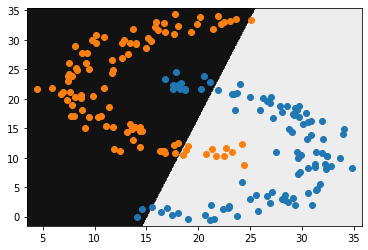

In [24]:
#Decision Boundary - Logistic Regression on dataset3
min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

# define the model and fit model
model_log3 = LogisticRegression()
model_log3.fit(X3, t3)

yhat = model_log3.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t3 == class_value)
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap=plt.cm.binary)

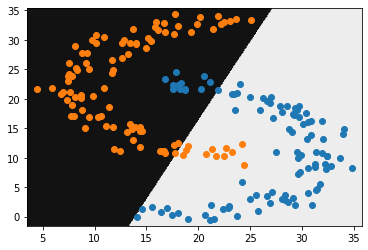

In [25]:
#Decision Boundary -  Gaussian Naive Bayes Classifier on dataset3

min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

# define the model and fit model
model_gaus3 = GaussianNB()
model_gaus3.fit(X3, t3)

yhat_gaus = model_gaus3.predict(grid)
zz = yhat_gaus.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t3 == class_value)
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap=plt.cm.binary)

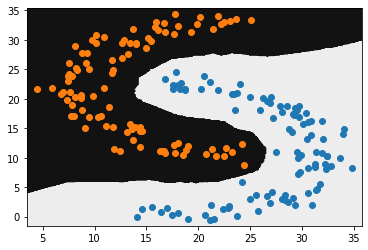

In [26]:
#Decision Boundary - K-Nearest Neighbor classifier on dataset3
min1, max1 = X3[:, 0].min()-1, X3[:, 0].max()+1
min2, max2 = X3[:, 1].min()-1, X3[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

# define the model and fit model
model_knn3 = KNeighborsClassifier()
model_knn3.fit(X3, t3)

yhat = model_knn3.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.binary)

# create scatter plot for samples from each class
for class_value in range(2):
    row_ix = np.where(t3 == class_value)
    plt.scatter(X3[row_ix, 0], X3[row_ix, 1], cmap=plt.cm.binary)

For the third data set, using K-Nearest Neighbor classifiers has the best score therefore using KNN is the most accurate compared to the other models.